In [1]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten
from keras import Sequential
from keras.datasets import mnist

In [2]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"] = (10,8)

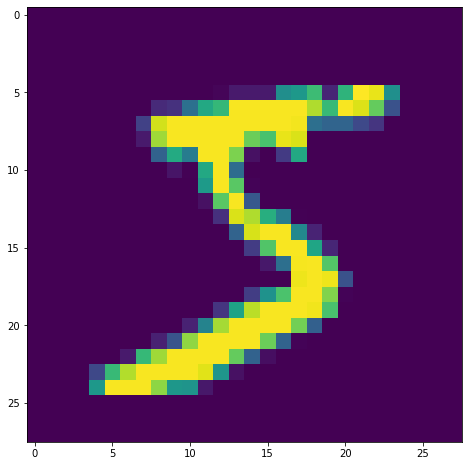

In [8]:
plt.imshow(X_train[0])

### Creating a CNN model

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 128)               1982592   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,002,698
Trainable params: 2,002,698
Non-

- Observations:
     1. With each layers Covnvulation layes the size of image is reduceing as we select no padding each new image is reduce by formula (size-padding + 1)
     2. here Strident = (1,1)

### Convulation with strident and padding

In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,231,498
Trainable params: 3,231,498
No

- Observations:
    1. As we add pdding with image it did not reduce the size of image
    2. output shape in each layer did not change.

### CNN with Strides

In [15]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 85,770
Trainable params: 85,770
Non-trai

- we use strid to reduce calculation and make process fast.